# 🧪 Model Prototyping with Processed Threat Datasets

This notebook demonstrates how to train basic ML models on a small sample from the cleaned datasets.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
# Load processed NSL-KDD99 dataset
df = pd.read_csv('../data/processed/NSL-KDD99/KDDTrain+_cleaned.csv')  # or CIC-IDS-2017
df.shape

(125973, 43)

In [12]:
# Prepare features and target
X = df.drop(columns=['label', 'difficulty'], errors='ignore')
y = pd.factorize(df['label'])[0]  # Encode label as numeric

# One-hot encode categorical features
X = pd.get_dummies(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# ✅ Suppress metric warnings from unseen classes
print(classification_report(y_test, y_pred, zero_division=0))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00      8228
           2       1.00      0.97      0.98       202
           3       0.99      0.99      0.99       733
           4       1.00      0.99      1.00       573
           5       1.00      1.00      1.00       188
           6       0.98      0.99      0.99       313
           7       1.00      0.99      0.99       738
           8       1.00      1.00      1.00       534
           9       1.00      0.93      0.96        43
          10       1.00      1.00      1.00       185
          11       1.00      0.91      0.95        11
          14       0.00      0.00      0.00         1
          15       1.00      0.33      0.50         9
          16       1.00      1.00      1.00         1
          17       1.00      0.88      0.93         8
          18       1.00      1.00      1.00         1
          19       0.00    

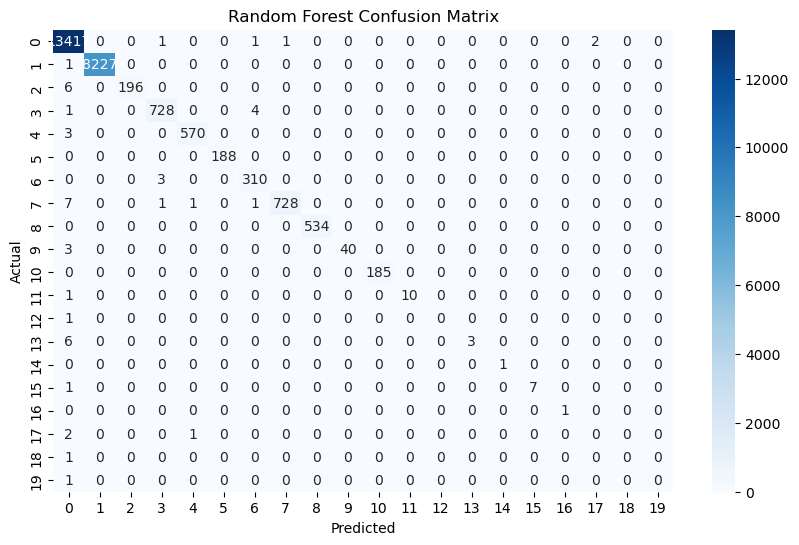

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     13422
           1       0.75      1.00      0.85      8228
           2       0.00      0.00      0.00       202
           3       0.00      0.00      0.00       733
           4       0.60      0.26      0.37       573
           5       0.00      0.00      0.00       188
           6       0.00      0.00      0.00       313
           7       0.00      0.00      0.00       738
           8       0.49      0.03      0.06       534
           9       0.00      0.00      0.00        43
          10       0.00      0.00      0.00       185
          11       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         8
          18       0.00    

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
